# Dokumentation Websocket

# Theoretischer Teil

**1. Auftrag**

Es soll ein theoretischer Teil erarbeitet werden. Dies soll in einem Jupyter Notebook dokumentiert werden. Ihre kvanC Gruppenarbeit soll in das bestehende Jupyter System integriert werden. Das heisst, es sollen auch Code Snippets dargestellt werden, welche die zentralen Aussagen aufzeigen oder unterstützend beschreiben (müssen nicht unbedingt ausgeführt werden, gerade wenn eine andere Programmiersprache verwendet wird). Dieses Notebook soll auch die Grundlage der Präsentation sein.

# `Websocket-Kommunikation`

### Inhaltsverzeichnis
- Einführung Websocket
- Asynchrone Programmierung
- Code-Snippets
- Demo

---

## `Einführung`

### Was ist Websocket? Folie 1
- ein Netzwerkprotokoll
- Kommunikation basiert auf TCP
- erlaubt eine Full-Duplex Kommunikation über TCP Verbindung
- Kommunikation wird client-seitig initialisiert --> sendet Request an den Server (ähnlich wie bei http)

### Wann werden Websockets verwendet? Folie 2
- Bei einem schnelle Aufbau von Verbindungen
    - z.B. bei News-Ticker, Support-Chats oder allgemein Chat-Applikationen
    - Da die Verbindung bereits besteht, können Daten kontinuierlich übertragen werden und ist somit auch schneller
- Wenn Informationen in Echtzeit dargestellt werden sollen

#### *Vorteile* Folie 3
- schnellere Ladezeiten, da bei bidirektionaler Anwendung in beide Richtungen kommuniziert werden kann
- Annäherung an Echtzeit
- nur eine einzige TCP Verbindung wird benötigt

#### *Nachteil* Folie 4
- die vom Server gesendeten Ereignisse bieten keinen Mechanismus um gelöschte Clients zu erkennen, bis eine Nachricht gesendet wird.

### Welches Protokoll wird verwendet? Folie 5 --> OSI?
- Das Low-Level Protokoll TCP oder UDP
- Ein Internet-Socket (entweder TCP/IP oder UDP/IP) wird verwendet
    - Es wird an Protokoll, IP-Adresse und Port gebunden z. B. tcp://127.0.0.0.1:56985
    - Sockets sind Schnittstellen zwischen einem Anwendungsprozess und der Transportschicht

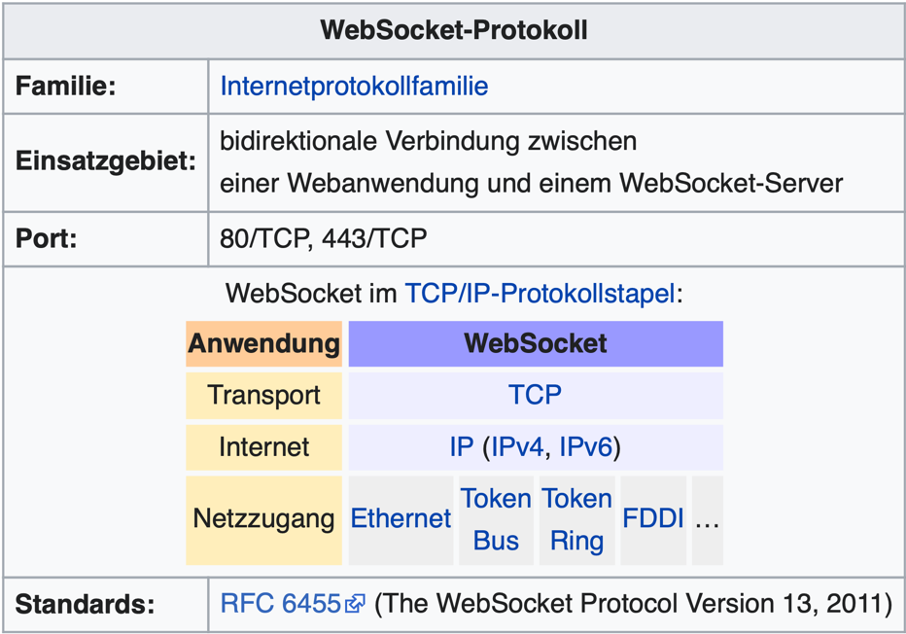

In [15]:
from IPython.display import Image
Image(filename='Images/websocket_protokoll.png', width=600, height=1000)

### Websocket als Internetprotokoll Folie 6
- Websocket erlaubt eine Full-Duplex-Kommunikation, heisst es gibt eine Verbindung zwischen zwei Kommunikationsendpunkten (Server und Client) und Daten können in beide Richtungen gleichzeitig gesendet werden.

- Eine Kommunikation in beide Richtungen mit gleichzeitigem Senden von Daten nennt man bidirektional. Client und Server sind also gleichwertige Kommunikationspartner.

- Websocket ist ein Upgrade des HTTP-Protokoll. Es braucht als Low-Level-Protokoll (Datenübertragung) das TCP, welches die Basis eines Applikationsprotokolls darstellt.

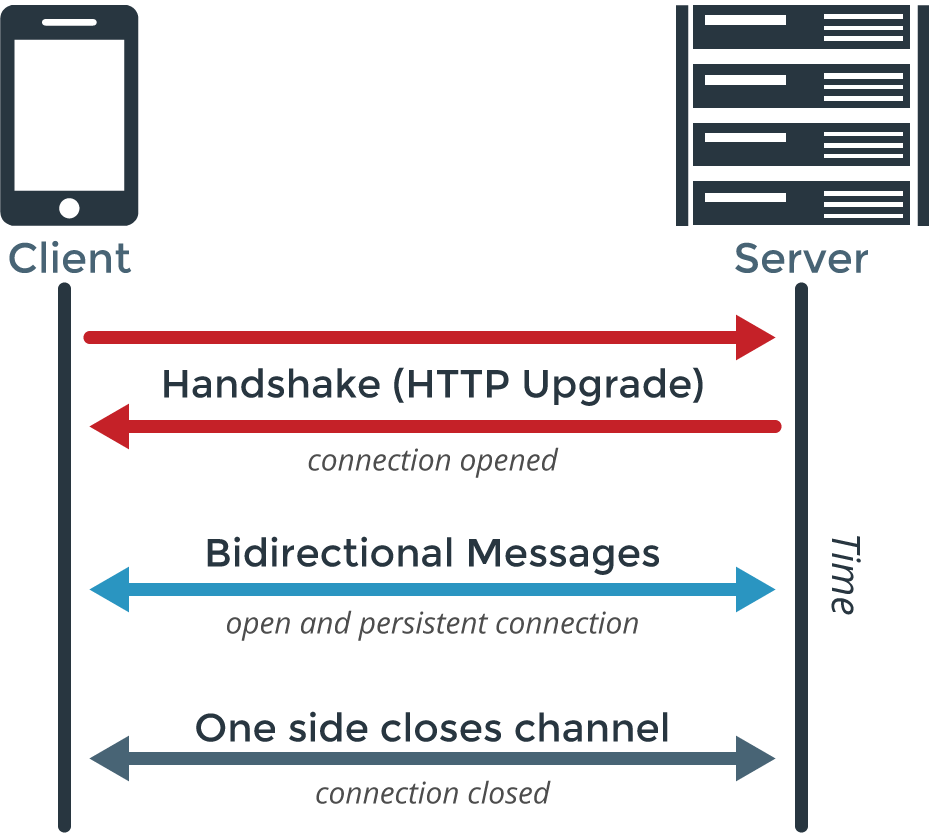

In [8]:
Image(filename='Images/websocket_communication.png', width=600, height=1200)

### Komponenten Folie 7 & 8
- Der Client startet die Kommunikation indem einen Update-Request initiiert wird. Dieser Opening-Handshake vom Client ist ein valider HTTP-Request bei dem er alle benötigten Identifikationen für den informationsaustausch an den Server sendet.

- Der Server bestätigt den Update-Request vom Client mit einer validen HTTP-Response.

- Nach der Übertragung der Daten zum Verbindungsaufbau bleibt die zugrundeliegende TCP-Verbindung stehen.

- Die Verbindung wird geschlossen indem einer der beiden Seiten ein Close-Frame sendet. Als Antwort auf diesen Frame muss ebenfalls ein Close-Frame gesendet werden. Daraufhin wird die Verbindung getrennt.

#### *Weiteres zum Websocket* Folie 9
- Das URI-Schema von Websocket lautet
    - ws: unverschlüsselte Verbindung
    - wss: verschlüsselte Verbindung


- Da der Verbindungsaufbau vom Client mittels HTTP übere den Standard Internet Port (80) erfolgt, stellen Firewalls in dieser hinsicht keine Probleme mehr da.

- Nur der Client hat die Möglichkeit einen Kommunikationsaufbau herzustellen.

---

## `Asynchrone Programmierung`

### Definiton Folie 10 evtl 11
- Mit Asynchrone Programmierung erlaubt man dem Code andere Aufgaben zu erledigen, während man auf die Antwort einer Ressource abwartet,

    - z.B Einen http-Request einreichen und in dieser Zeit andere Arbeiten erledigen, die in einer Warteschlange warten, während man auf die Beendigung des eigentlichen http-Request wartet.


- In Python werden Asynchrone Funktionen «Coroutine» genannt, welche die Keywörter async und await brauchen.

- Async stellt sicher, dass eine Funktion ein return statement zurückgibt und/oder eine await expression besitzt. Während man auf den Rückgabewert der await expression wartet, werden in der Zwischenzeit andere Code-Teile ausgeführt.

### Async in Websockets (Python) Folie 12
- Websocket Verbindungen sind asynchron, weil Client und Server Daten zur jeder Zeit (gleichzeitig möglich) ohne jegliche Einschränkungen schicken können.

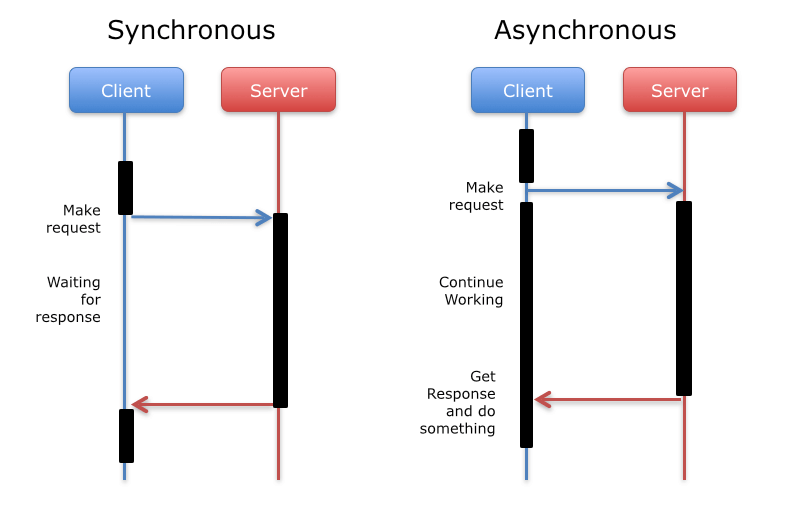

In [11]:
Image(filename='Images/async_vs_sync.png', width=700, height=1200)

---

## `Aufbau Websocket-Kommunikation mit Code-Snippets`

### Client-Code
In diesem Teil wird der Client-Code vom Websocket vereinfacht dargestellt und seine Funktionsweise erklärt.

#### Imports

In [2]:
import asyncio
import os
import websockets
from re import search

#### Vorbereitung:

In [3]:
host = 'julia.mueller' # Host definieren
port = 8000            # Port definieren

url = f"ws://{host}:{port}" # url mit ws definieren

#### Verbindungsaufbau

In [ ]:
# Nur theoretisch, nicht ausführbar
async def run():
    async with websockets.connect(url) as websocket: # Verbindung mit Server aufbauen
        # Daten senden und erhalten

#### Datenübertragung

In [4]:
async def send_message(websocket): # Funktion fürs Senden
    message = ("Hello Server, its Async-Client!")
    print(message)
    await websocket.send(message)
    print(f">{message}")

In [5]:
async def receive_message(websocket): # Funktion fürs Erhalten
    response = await websocket.recv()
    print(f">{response}")

In [8]:
async def run(): # coroutine objekt
    async with websockets.connect(url) as websocket:
        
        await send_message(websocket)    # Daten senden
        await receive_message(websocket) # Daten erhalten
        
loop = asyncio.get_event_loop() # loop generien um auf laufenden Task zu verwenden
asyncio.run_coroutine_threadsafe(run(), loop) # Funktion kann von verschiedenen Programmbereichen mehrfach ausgeführt werden, ohne sich gegenseitig behindern 

<Future at 0x7f7818244760 state=pending>

#### Verbindungsende

In [7]:
async def send_message(websocket):
    message = ("Hello Server, its Async-Client!")
    print(message)
    for i in range(3):
        await websocket.send(message)
        print(f">{message}")
        
    await websocket.close() # Verbindung wird nach 3 mal senden geschlossen
    print('Connection was successfully closed.')

### Server-Code 
In diesem Teil wird die Funktionsweise des Server-Codes vereinfacht erklärt.

#### Verarbeitung der Kommunikations-Pattern

- Die Methode "connection_handler()" behandelt Kommunikation (1:1 und 1:all) zwischen den User und leitet die Nachrichten dementsprechend weiter. 
- Zuerst wird der User-Name an den Server geschickt und der User selber wird darauf in ein Dictionary mit dem entsprechenden Websocket-Objekt gespeichert und registriert.
- Danach wird der Empfänger abgefragt, ob die Nachricht an alle ("*") oder an einen bestimmten User im Dictionary gesendet werden soll.
- Ein User kann sich jederzeit abmelden. Dann wird er vom Dictionary entfernt.

In [13]:
async def connection_handler(websocket, path):
        first = True
        user_name = None
        
        try:
            async for msg in websocket:
                if first:
                    user_name = msg
                    print(f"Address: {websocket.remote_address} of User {user_name}")
                    clients_connected[user_name] = websocket 
                    print(f"All Clients connected: {clients_connected}\n")
                    first = False
                    continue
        
                receiver, message = msg.split(':', maxsplit=1)
                    
                if receiver == "*": 
                    for name, websocketobject in clients_connected.items(): 
                        if name != user_name:
                            await websocketobject.send(f"{user_name}:{message}") # send to all clients
                else:
                    if receiver in clients_connected: 
                        await clients_connected[receiver].send(f"{user_name}:{message}") # send to one client
                    else:
                        await websocket.send(f"Server: {receiver} does not exist. Try sending it to another User.")
                
        except websockets.ConnectionClosedError:
            pass
        
        finally:
            print(f"User {user_name} was successfully disconnected.")
            del clients_connected[user_name]

#### Server starten

In [14]:
start_server = websockets.serve(connection_handler, host, port)
print(f"Websocket-Server {start_server} started.")

asyncio.ensure_future(start_server)

Websocket-Server <websockets.server.Serve object at 0x7f78182444f0> started.


<Task pending name='Task-7' coro=<_wrap_awaitable() running at /opt/conda/envs/kvanc/lib/python3.8/asyncio/tasks.py:677>>

Der Websocket-Server wurde erfolgreich gestartet.

---

## `Demo Chat-Applikation`

Folie 13??

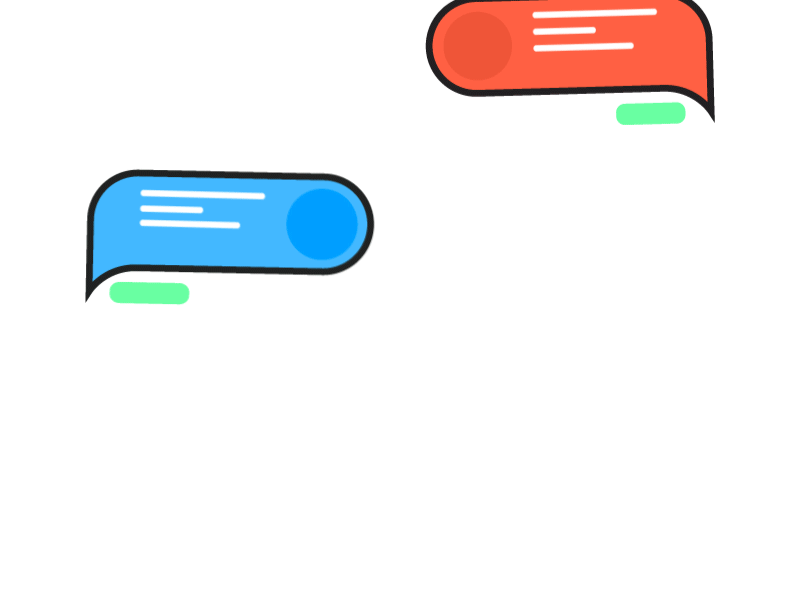

In [16]:
Image(filename='Images/chat.gif', width=700, height=1200)

- Notebooks zeigen (Client und Server) 
    - Funktionsweise Chat? 
    - Nachrichten schicken an alle, an User und an Bot.
    - Abmelden mit exit
- User sollen ins Client-Notebook wechseln
- Server offen lassen, zeigen dass sie sich angemeldet haben 

---

### Referenzen

Folie 14

Abschlussfolie? Folie 15